In [56]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
fine_df_file = '../data/interim/fine_enriched_parking_violations.tsv'

In [91]:
df = pd.read_csv(fine_df_file, sep='\t', parse_dates=['ticket_issue_datetime'])
df['counter'] = 1
df['dmv_area'] =  (df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA')

In [85]:
df.columns

Index(['x', 'y', 'objectid', 'rowid_', 'holiday', 'violation_code',
       'violation_description', 'location', 'rp_plate_state', 'body_style',
       'address_id', 'streetsegid', 'xcoord', 'ycoord', 'filename',
       'ticket_issue_datetime', 'fine', 'counter', 'dmv_area'],
      dtype='object')

# Add Filter DMV Versus Other States

In [98]:
df['dmv_area'] =  (df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA')

# Compare Total Tickets and Fines Between States

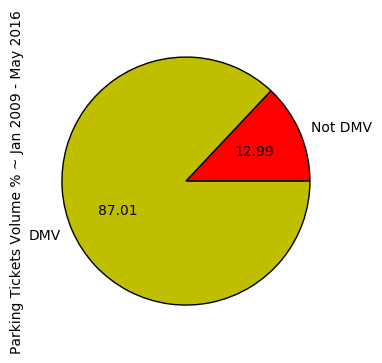

In [84]:
dmv_vs_other = df.groupby(df.dmv_area).counter.sum()#.reset_index()
# dmv_vs_other# .name('Parking Tickets Jan 2009 - May 2016')

dmv_vs_other = pd.Series(dmv_vs_other, name='Parking Tickets Volume % ~ Jan 2009 - May 2016')

dmv_vs_other.plot.pie(labels=['Not DMV', 'DMV'], colors=['r', 'y'], autopct='%.2f', figsize=(4, 4))

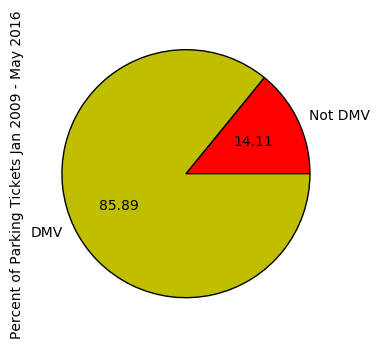

In [80]:
dmv_vs_other = df.groupby(df.dmv_area).fine.sum()#.reset_index()
# dmv_vs_other# .name('Parking Tickets Jan 2009 - May 2016')

dmv_vs_other = pd.Series(dmv_vs_other, name='Parking Ticket Fine Percent ~ Jan 2009 - May 2016')

dmv_vs_other.plot.pie(labels=['Not DMV', 'DMV'], colors=['r', 'y'], autopct='%.2f', figsize=(4, 4))

# TimeSeries

In [108]:
dates = pd.date_range(df.ticket_issue_datetime.min(), df.ticket_issue_datetime.max(), freq='Q')

In [161]:
dmv_datetime = df[["ticket_issue_datetime", 'dmv_area', 'fine', 'counter']]

dmv_datetime.set_index("ticket_issue_datetime", inplace=True)


three_month_groups = dmv_datetime.groupby(pd.TimeGrouper('3M')).apply(lambda x: x.groupby('dmv_area').sum())

In [150]:
total_by_6month = dmv_datetime.groupby(pd.TimeGrouper('6M')).sum()
total_by_6month

,dmv_area,fine,counter
ticket_issue_datetime,,,
2009-01-31,107846.0,5502835.0,125258
2009-07-31,880060.0,45118160.0,1016882
2010-01-31,951144.0,50813100.0,1101074
2010-07-31,592533.0,32513540.0,683246
2011-01-31,774496.0,39468475.0,894473
2011-07-31,699422.0,36656750.0,806602
2012-01-31,1178548.0,62639450.0,1349959
2012-07-31,1206489.0,65105490.0,1388052
2013-01-31,689766.0,37383350.0,793547


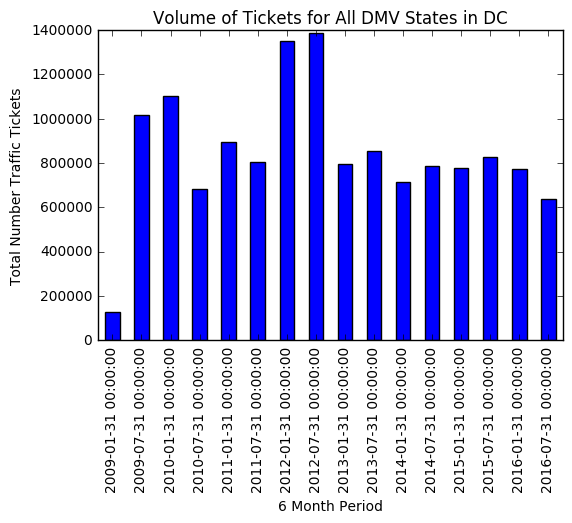

In [171]:
total_by_6month.counter.plot(kind='bar', title="Volume of Tickets for All DMV States in DC")
plt.xlabel('6 Month Period')
plt.ylabel('Total Number Traffic Tickets')

In [180]:
year_period = dmv_datetime.groupby(pd.TimeGrouper('12M')).apply(lambda x: x.groupby('dmv_area').sum())
year_period#.plot(kind='bar', title="Volume of Tickets for All DMV States in DC")

fine  counter
ticket_issue_datetime dmv_area                     
2009-01-31            False       791580.0    17412
                      True       4711255.0   107846
2010-01-31            False     13929670.0   286752
                      True      82001590.0  1831204
2011-01-31            False     10453965.0   210690
                      True      61528050.0  1367029
2012-01-31            False     14066750.0   278591
                      True      85229450.0  1877970
2013-01-31            False     14644170.0   285344
                      True      87844670.0  1896255
2014-01-31            False     10526895.0   202055
                      True      64265860.0  1365820
2015-01-31            False     10405310.0   197819
                      True      65234860.0  1365325
2016-01-31            False     10890900.0   199512
                      True      69698650.0  1399450
2017-01-31            False      4196325.0    78478
                      True      26588415.0   556949

# Select Only Violations that are DC, Maryland or Virginia

In [7]:
selected_states = set(['DC', 'MD', 'VA'])

In [18]:
 = df[(df.rp_plate_state=='DC') | (df.rp_plate_state=='MD') | (df.rp_plate_state=='VA') ]

In [21]:
dmv_df.fine.sum()

547102800.0

In [22]:
df.fine.sum()

637008365.0